# Feature Scaling
## Entendendo as Diferenças e Quando Usar Cada Uma

---

## Sumário

1. Introdução: Por que Escalar Dados?
2. O Problema da Escala
3. Standardization (Z-Score)
4. Min-Max Normalization
5. Mean Normalization
6. Max Abs Scaling
7. Robust Scaling
8. Comparação Prática
9. Quando Usar Cada Uma
10. Implementação com Scikit-Learn

---
## 1. Introdução: Por que Escalar Dados?

### O Problema

![Capa](../../Assets/feature%20scaling/1.png)

Em Machine Learning, features frequentemente têm escalas muito diferentes:

**Exemplo: Dataset de Imóveis**
- Área: 50 a 500 m² (escala de centenas)
- Número de quartos: 1 a 5 (escala de unidades)
- Preço por m²: 1000 a 10000 (escala de milhares)

### Por que isso é um problema?

**1. Algoritmos baseados em distância:**
- K-Nearest Neighbors (KNN)
- K-Means Clustering
- Support Vector Machines (SVM)

Features com valores maiores dominam o cálculo da distância.

**2. Gradiente Descendente:**
- Redes Neurais
- Regressão Logística
- Regressão Linear

Convergência lenta e instável quando features têm escalas diferentes.

**3. Regularização:**
- Features com escalas maiores recebem penalidades maiores injustamente

### Solução

Transformar todas as features para uma escala comum através de:
- Normalization (Normalização)
- Standardization (Padronização)

---

In [7]:
# Setup inicial
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    MaxAbsScaler,
    RobustScaler
)
from sklearn.datasets import make_classification
import warnings
warnings.filterwarnings('ignore')

# Configurações de visualização
sns.set_theme(style='white')
plt.rcParams['figure.figsize'] = (12, 6)

print("Bibliotecas importadas com sucesso")

Bibliotecas importadas com sucesso


---
## 2. O Problema da Escala

### Criando Dados com Escalas Diferentes

In [9]:
# Criar dataset com escalas diferentes
np.random.seed(42)

# Feature 1: Área (50 a 500)
area = np.random.uniform(50, 500, 100)

# Feature 2: Quartos (1 a 5)
rooms = np.random.randint(1, 6, 100)

# Feature 3: Preço por m² (1000 a 10000)
price_per_m2 = np.random.uniform(1000, 10000, 100)

# Criar DataFrame
df_original = pd.DataFrame({
    'Area': area,
    'Rooms': rooms,
    'Price_per_m2': price_per_m2
})

df_original.head()

,Area,Rooms,Price_per_m2
0,218.543053,1,7616.945073
1,477.821438,4,2881.644587
2,379.397274,5,5873.031764
3,319.396318,4,7262.059594
4,120.208388,5,3056.950196


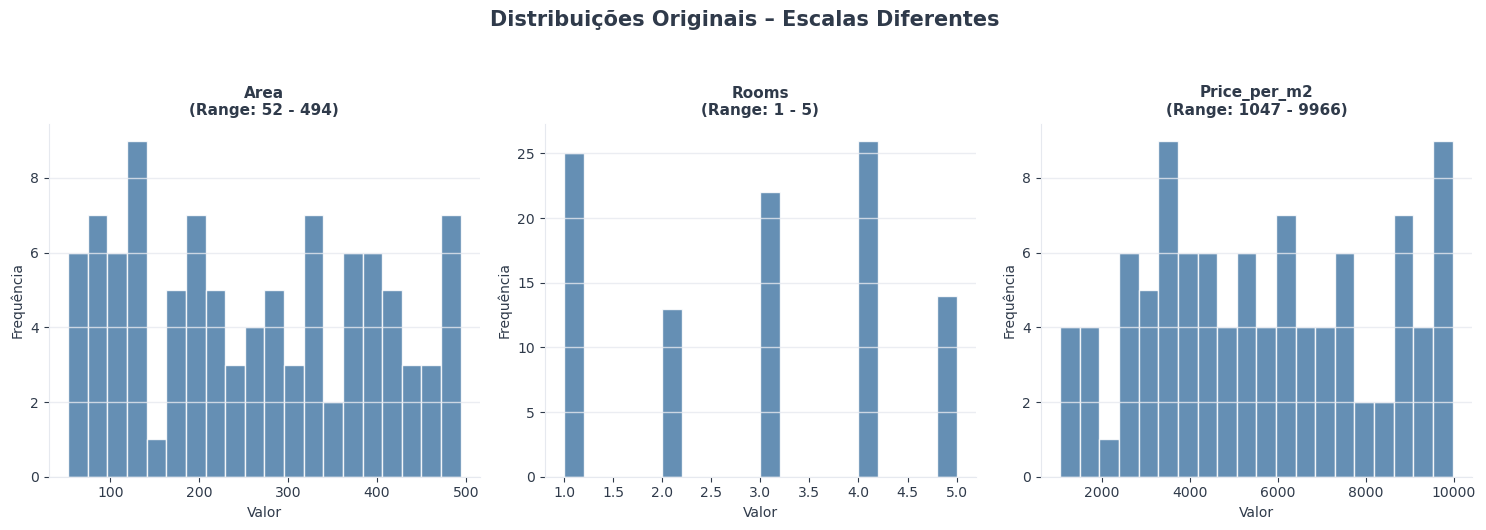


Observação: As escalas são completamente diferentes
Area: escala de 494
Rooms: escala de 5
Price_per_m2: escala de 9966


In [12]:
# Paleta
MAIN_BLUE = '#4A7BA7'
LIGHT_BLUE = '#8FB6D8'
GRID_COLOR = '#E6E9EF'
TEXT_COLOR = '#2F3A4A'

plt.style.use('default')

# Visualizar distribuições originais
fig, axes = plt.subplots(1, 3, figsize=(15, 5), facecolor='white')

for idx, col in enumerate(df_original.columns):
    axes[idx].hist(
        df_original[col],
        bins=20,
        color=MAIN_BLUE,
        alpha=0.85,
        edgecolor='white'
    )

    axes[idx].set_title(
        f'{col}\n(Range: {df_original[col].min():.0f} - {df_original[col].max():.0f})',
        fontsize=11,
        fontweight='bold',
        color=TEXT_COLOR
    )

    axes[idx].set_xlabel('Valor', fontsize=10, color=TEXT_COLOR)
    axes[idx].set_ylabel('Frequência', fontsize=10, color=TEXT_COLOR)

    # Grid suave, parecido com a imagem
    axes[idx].grid(
        axis='y',
        color=GRID_COLOR,
        linestyle='-',
        linewidth=1,
        alpha=0.8
    )

    # Remover bordas superiores e direita (look clean)
    axes[idx].spines['top'].set_visible(False)
    axes[idx].spines['right'].set_visible(False)

    axes[idx].spines['left'].set_color(GRID_COLOR)
    axes[idx].spines['bottom'].set_color(GRID_COLOR)

    axes[idx].tick_params(colors=TEXT_COLOR)

plt.suptitle(
    'Distribuições Originais – Escalas Diferentes',
    fontsize=15,
    fontweight='bold',
    color=TEXT_COLOR,
    y=1.05
)

plt.tight_layout()
plt.show()

print("\nObservação: As escalas são completamente diferentes")
print(f"Area: escala de {df_original['Area'].max():.0f}")
print(f"Rooms: escala de {df_original['Rooms'].max():.0f}")
print(f"Price_per_m2: escala de {df_original['Price_per_m2'].max():.0f}")

### Problema na Prática: Distância Euclidiana

![Capa](../../Assets/feature%20scaling/2.png)


**A formula:**
$$
d(\mathbf{x}, \mathbf{y}) = \sqrt{\sum_{i=1}^{n}(x_i - y_i)^2}
$$


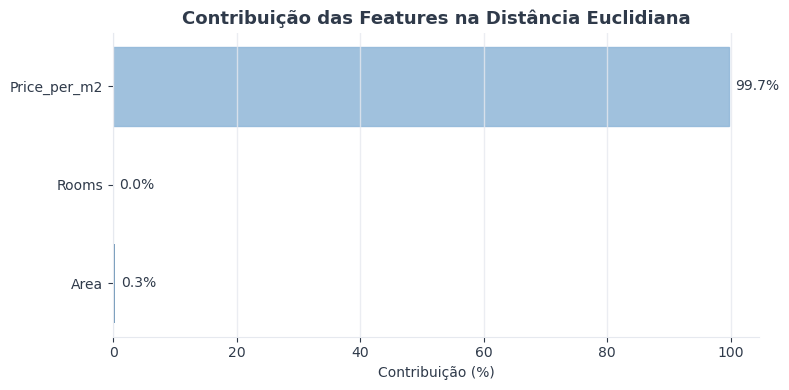

In [21]:
# Labels e valores
features = df_original.columns
values = percentage_contribution

fig, ax = plt.subplots(figsize=(8, 4), facecolor='white')

bars = ax.barh(
    features,
    values,
    color=MAIN_BLUE,
    alpha=0.85
)

# Destacar a feature dominante
dominant_idx = np.argmax(values)
bars[dominant_idx].set_color(LIGHT_BLUE)

# Anotações de percentual
for bar, value in zip(bars, values):
    ax.text(
        bar.get_width() + 1,
        bar.get_y() + bar.get_height() / 2,
        f'{value:.1f}%',
        va='center',
        fontsize=10,
        color=TEXT_COLOR
    )

# Estilo
ax.set_title(
    'Contribuição das Features na Distância Euclidiana',
    fontsize=13,
    fontweight='bold',
    color=TEXT_COLOR
)

ax.set_xlabel('Contribuição (%)', fontsize=10, color=TEXT_COLOR)

ax.grid(
    axis='x',
    color=GRID_COLOR,
    linestyle='-',
    linewidth=1,
    alpha=0.8
)

# Clean look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color(GRID_COLOR)
ax.spines['bottom'].set_color(GRID_COLOR)
ax.tick_params(colors=TEXT_COLOR)

plt.tight_layout()
plt.show()

---
## 3. Standardization (Z-Score Normalization)

### Conceito

![Capa](../../Assets/feature%20scaling/4.png)


Standardization transforma os dados para ter **média = 0** e **desvio padrão = 1**.

### Fórmula Matemática

$$
z = \frac{x - \mu}{\sigma}
$$

Onde:

- **$z$** = valor padronizado  
- **$x$** = valor original  
- **$\mu$** = média da *feature*  
- **$\sigma$** = desvio padrão da *feature*


### Interpretação

O valor padronizado (z) representa **quantos desvios padrão** o valor original está da média.

**Exemplos:**
- z = 0: valor está exatamente na média
- z = 1: valor está 1 desvio padrão acima da média
- z = -2: valor está 2 desvios padrão abaixo da média

### Propriedades

1. Não limita os valores a um intervalo específico
2. Preserva a forma da distribuição original
3. Funciona bem com distribuições normais
4. Sensível a outliers

### Quando Usar

- Algoritmos que assumem dados normalmente distribuídos
- Quando não há limite conhecido para os valores
- Quando outliers são informativos
- Regressão Linear, Logística, Redes Neurais, PCA

---


In [24]:
# Implementação manual de Standardization
def standardize(data):
    """
    Aplica Z-Score Standardization
    z = (x - μ) / σ
    """
    mean = np.mean(data)
    std = np.std(data)
    standardized = (data - mean) / std
    return standardized, mean, std


# Aplicar standardization
area_std, area_mean, area_std_val = standardize(df_original['Area'].values)
rooms_std, rooms_mean, rooms_std_val = standardize(df_original['Rooms'].values)
price_std, price_mean, price_std_val = standardize(
    df_original['Price_per_m2'].values)

df_standardized = pd.DataFrame({
    'Area_std': area_std,
    'Rooms_std': rooms_std,
    'Price_std': price_std
})

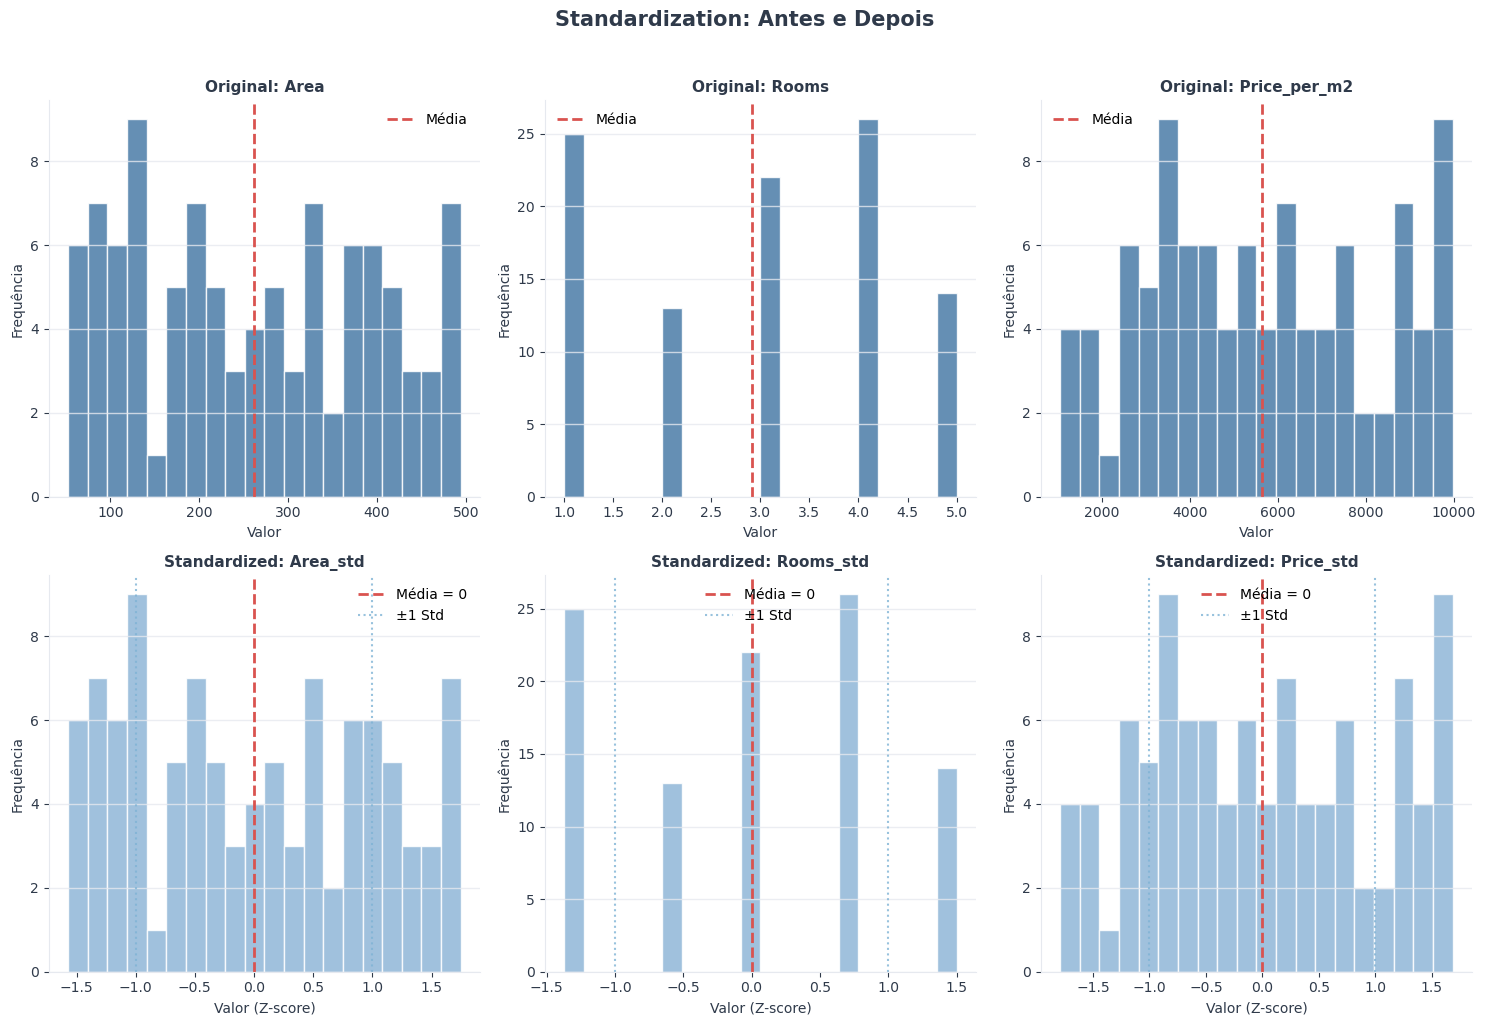

In [28]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10), facecolor='white')

MAIN_BLUE = '#4A7BA7'
LIGHT_BLUE = '#8FB6D8'
GRID_COLOR = '#E6E9EF'
TEXT_COLOR = '#2F3A4A'
MEAN_COLOR = '#D9534F'
STD_COLOR = '#7FB3D5'


# =========================
# Dados originais
# =========================
for idx, col in enumerate(df_original.columns):
    ax = axes[0, idx]

    ax.hist(
        df_original[col],
        bins=20,
        color=MAIN_BLUE,
        alpha=0.85,
        edgecolor='white'
    )

    ax.axvline(
        df_original[col].mean(),
        color=MEAN_COLOR,
        linestyle='--',
        linewidth=2,
        label='Média'
    )

    ax.set_title(
        f'Original: {col}',
        fontsize=11,
        fontweight='bold',
        color=TEXT_COLOR
    )

    ax.set_xlabel('Valor', fontsize=10, color=TEXT_COLOR)
    ax.set_ylabel('Frequência', fontsize=10, color=TEXT_COLOR)

    ax.grid(
        axis='y',
        color=GRID_COLOR,
        linewidth=1,
        alpha=0.8
    )

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color(GRID_COLOR)
    ax.spines['bottom'].set_color(GRID_COLOR)
    ax.tick_params(colors=TEXT_COLOR)

    ax.legend(frameon=False)

# =========================
# Dados padronizados
# =========================
for idx, col in enumerate(df_standardized.columns):
    ax = axes[1, idx]

    ax.hist(
        df_standardized[col],
        bins=20,
        color=LIGHT_BLUE,
        alpha=0.85,
        edgecolor='white'
    )

    ax.axvline(
        0,
        color=MEAN_COLOR,
        linestyle='--',
        linewidth=2,
        label='Média = 0'
    )

    ax.axvline(
        -1,
        color=STD_COLOR,
        linestyle=':',
        linewidth=1.5,
        alpha=0.8
    )

    ax.axvline(
        1,
        color=STD_COLOR,
        linestyle=':',
        linewidth=1.5,
        alpha=0.8,
        label='±1 Std'
    )

    ax.set_title(
        f'Standardized: {col}',
        fontsize=11,
        fontweight='bold',
        color=TEXT_COLOR
    )

    ax.set_xlabel('Valor (Z-score)', fontsize=10, color=TEXT_COLOR)
    ax.set_ylabel('Frequência', fontsize=10, color=TEXT_COLOR)

    ax.grid(
        axis='y',
        color=GRID_COLOR,
        linewidth=1,
        alpha=0.8
    )

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color(GRID_COLOR)
    ax.spines['bottom'].set_color(GRID_COLOR)
    ax.tick_params(colors=TEXT_COLOR)

    ax.legend(frameon=False)

plt.suptitle(
    'Standardization: Antes e Depois',
    fontsize=15,
    fontweight='bold',
    color=TEXT_COLOR,
    y=1.02
)

plt.tight_layout()
plt.show()

---
## 4. Min-Max Normalization

### Conceito

Min-Max Normalization escala os dados para um intervalo específico, geralmente **[0, 1]**.

### Fórmula Matemática

$$
x_{\text{normalized}} = \frac{x - x_{\min}}{x_{\max} - x_{\min}}
$$

Onde:

- **$x$** = valor original  
- **$x_{\min}$** = valor mínimo da *feature*  
- **$x_{\max}$** = valor máximo da *feature*  

### Interpretação

O valor normalizado representa a **posição relativa** do valor original entre o mínimo e o máximo.

**Exemplos no intervalo [0, 1]:**
- x_normalized = 0: valor é o mínimo
- x_normalized = 0.5: valor está no meio do intervalo
- x_normalized = 1: valor é o máximo

### Propriedades

1. Todos os valores ficam no intervalo [0, 1]
2. Preserva relações entre os valores
3. Muito sensível a outliers
4. Comprime a distribuição original

### Quando Usar

- Redes Neurais (especialmente camadas de entrada)
- Algoritmos que precisam de valores limitados
- Quando a escala tem significado (ex: pixels de imagem 0-255)
- K-Nearest Neighbors, Redes Neurais, Algoritmos de Imagem

---


In [30]:
# Implementação manual de Min-Max Normalization
def min_max_normalize(data, feature_range=(0, 1)):
    """
    Aplica Min-Max Normalization
    x_norm = (x - min) / (max - min) para [0, 1]
    ou
    x_norm = a + (x - min) * (b - a) / (max - min) para [a, b]
    """
    min_val = np.min(data)
    max_val = np.max(data)
    a, b = feature_range

    normalized = a + (data - min_val) * (b - a) / (max_val - min_val)
    return normalized, min_val, max_val


# Aplicar Min-Max Normalization
area_minmax, area_min, area_max = min_max_normalize(df_original['Area'].values)
rooms_minmax, rooms_min, rooms_max = min_max_normalize(
    df_original['Rooms'].values)
price_minmax, price_min, price_max = min_max_normalize(
    df_original['Price_per_m2'].values)

df_minmax = pd.DataFrame({
    'Area_minmax': area_minmax,
    'Rooms_minmax': rooms_minmax,
    'Price_minmax': price_minmax
})

print("MIN-MAX NORMALIZATION")
print("="*70)
print("\nParâmetros calculados:")
print(f"Area    - Min: {area_min:.2f}, Max: {area_max:.2f}")
print(f"Rooms   - Min: {rooms_min:.2f}, Max: {rooms_max:.2f}")
print(f"Price   - Min: {price_min:.2f}, Max: {price_max:.2f}")

print("\nDados normalizados:")
print(df_minmax.describe())

MIN-MAX NORMALIZATION

Parâmetros calculados:
Area    - Min: 52.48, Max: 494.10
Rooms   - Min: 1.00, Max: 5.00
Price   - Min: 1046.66, Max: 9966.28

Dados normalizados:
       Area_minmax  Rooms_minmax  Price_minmax
count   100.000000    100.000000    100.000000
mean      0.473482      0.477500      0.515314
std       0.303138      0.350135      0.289559
min       0.000000      0.000000      0.000000
25%       0.191242      0.187500      0.276674
50%       0.467329      0.500000      0.495787
75%       0.738442      0.750000      0.746540
max       1.000000      1.000000      1.000000


In [31]:
# Verificar intervalo
print("\nVERIFICAÇÃO DO INTERVALO [0, 1]")
print("="*70)
for col in df_minmax.columns:
    min_check = df_minmax[col].min()
    max_check = df_minmax[col].max()
    print(f"{col:15s} - Min: {min_check:.6f}, Max: {max_check:.6f}")


VERIFICAÇÃO DO INTERVALO [0, 1]
Area_minmax     - Min: 0.000000, Max: 1.000000
Rooms_minmax    - Min: 0.000000, Max: 1.000000
Price_minmax    - Min: 0.000000, Max: 1.000000


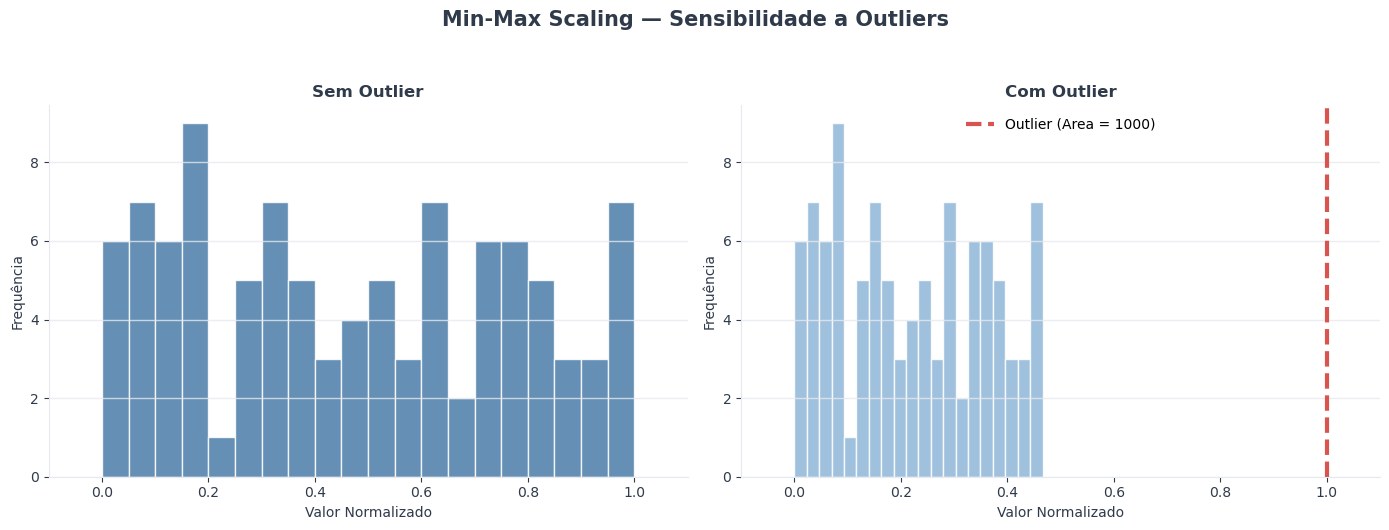

In [40]:
# =========================
# Visualização
# =========================
fig, axes = plt.subplots(1, 2, figsize=(14, 5), facecolor='white')

MAIN_BLUE = '#4A7BA7'
LIGHT_BLUE = '#8FB6D8'
GRID_COLOR = '#E6E9EF'
TEXT_COLOR = '#2F3A4A'
OUTLIER_COLOR = '#D9534F'

# -------------------------
# Sem outlier
# -------------------------
ax = axes[0]

ax.hist(
    norm_without,
    bins=20,
    color=MAIN_BLUE,
    alpha=0.85,
    edgecolor='white'
)

ax.set_title(
    'Sem Outlier',
    fontsize=12,
    fontweight='bold',
    color=TEXT_COLOR
)

ax.set_xlabel('Valor Normalizado', fontsize=10, color=TEXT_COLOR)
ax.set_ylabel('Frequência', fontsize=10, color=TEXT_COLOR)
ax.set_xlim(-0.1, 1.1)

ax.grid(
    axis='y',
    color=GRID_COLOR,
    linewidth=1,
    alpha=0.8
)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color(GRID_COLOR)
ax.spines['bottom'].set_color(GRID_COLOR)
ax.tick_params(colors=TEXT_COLOR)

# -------------------------
# Com outlier
# -------------------------
ax = axes[1]

ax.hist(
    norm_with[:-1],
    bins=20,
    color=LIGHT_BLUE,
    alpha=0.85,
    edgecolor='white'
)

ax.axvline(
    norm_with[-1],
    color=OUTLIER_COLOR,
    linestyle='--',
    linewidth=3,
    label='Outlier (Area = 1000)'
)

ax.set_title(
    'Com Outlier',
    fontsize=12,
    fontweight='bold',
    color=TEXT_COLOR
)

ax.set_xlabel('Valor Normalizado', fontsize=10, color=TEXT_COLOR)
ax.set_ylabel('Frequência', fontsize=10, color=TEXT_COLOR)
ax.set_xlim(-0.1, 1.1)

ax.grid(
    axis='y',
    color=GRID_COLOR,
    linewidth=1,
    alpha=0.8
)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color(GRID_COLOR)
ax.spines['bottom'].set_color(GRID_COLOR)
ax.tick_params(colors=TEXT_COLOR)

ax.legend(frameon=False)

# -------------------------
# Título geral
# -------------------------
plt.suptitle(
    'Min-Max Scaling — Sensibilidade a Outliers',
    fontsize=15,
    fontweight='bold',
    color=TEXT_COLOR,
    y=1.05
)

plt.tight_layout()
plt.show()

---
## 5. Mean Normalization

### Conceito

Mean Normalization centraliza os dados em torno de zero usando a média, e escala pelo range (max - min).

### Fórmula Matemática

$$
x_{\text{normalized}} = \frac{x - \mu}{x_{\max} - x_{\min}}
$$

Onde:

- **$x$** = valor original  
- **$\mu$** = média da *feature*  
- **$x_{\max}$** = valor máximo da *feature*  
- **$x_{\min}$** = valor mínimo da *feature*


### Interpretação

Os valores ficam aproximadamente no intervalo **[-1, 1]**, centralizados em zero.

### Propriedades

1. Valores centralizados em zero (média = 0)
2. Aproximadamente no intervalo [-1, 1]
3. Sensível a outliers (usa range)
4. Menos comum que Min-Max e Standardization

### Quando Usar

- Quando quer centralizar mas usar range em vez de std
- Alternativa entre Min-Max e Standardization
- Menos comum na prática

---

In [33]:
# Implementação de Mean Normalization
def mean_normalize(data):
    """
    Aplica Mean Normalization
    x_norm = (x - mean) / (max - min)
    """
    mean_val = np.mean(data)
    min_val = np.min(data)
    max_val = np.max(data)

    normalized = (data - mean_val) / (max_val - min_val)
    return normalized, mean_val, min_val, max_val


# Aplicar Mean Normalization
area_mean, area_m, area_min_m, area_max_m = mean_normalize(
    df_original['Area'].values)
rooms_mean, rooms_m, rooms_min_m, rooms_max_m = mean_normalize(
    df_original['Rooms'].values)
price_mean, price_m, price_min_m, price_max_m = mean_normalize(
    df_original['Price_per_m2'].values)

df_mean_norm = pd.DataFrame({
    'Area_mean': area_mean,
    'Rooms_mean': rooms_mean,
    'Price_mean': price_mean
})

print("MEAN NORMALIZATION")
print("="*70)
print("\nParâmetros calculados:")
print(
    f"Area    - Mean: {area_m:.2f}, Range: [{area_min_m:.2f}, {area_max_m:.2f}]")
print(
    f"Rooms   - Mean: {rooms_m:.2f}, Range: [{rooms_min_m:.2f}, {rooms_max_m:.2f}]")
print(
    f"Price   - Mean: {price_m:.2f}, Range: [{price_min_m:.2f}, {price_max_m:.2f}]")

print("\nDados normalizados:")
print(df_mean_norm.describe())

MEAN NORMALIZATION

Parâmetros calculados:
Area    - Mean: 261.58, Range: [52.48, 494.10]
Rooms   - Mean: 2.91, Range: [1.00, 5.00]
Price   - Mean: 5643.07, Range: [1046.66, 9966.28]

Dados normalizados:
          Area_mean    Rooms_mean    Price_mean
count  1.000000e+02  1.000000e+02  1.000000e+02
mean  -5.273559e-17 -3.552714e-17 -8.493206e-17
std    3.031385e-01  3.501353e-01  2.895587e-01
min   -4.734820e-01 -4.775000e-01 -5.153137e-01
25%   -2.822396e-01 -2.900000e-01 -2.386394e-01
50%   -6.152950e-03  2.250000e-02 -1.952706e-02
75%    2.649600e-01  2.725000e-01  2.312265e-01
max    5.265180e-01  5.225000e-01  4.846863e-01


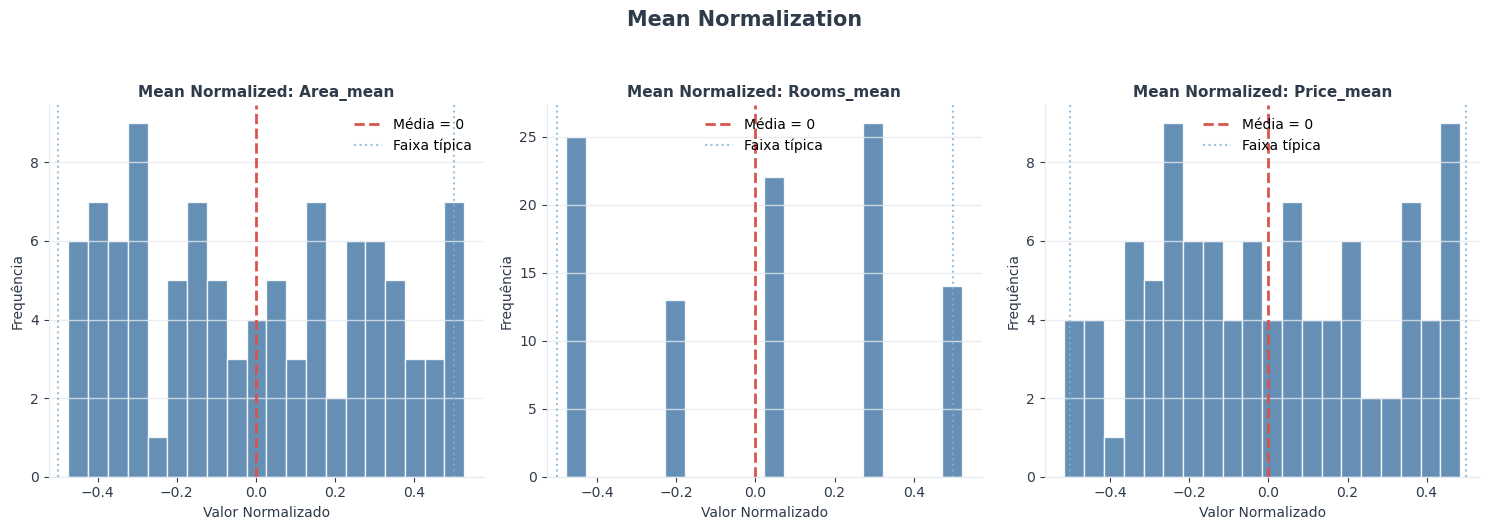

In [38]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), facecolor='white')

MAIN_BLUE = '#4A7BA7'
LIGHT_BLUE = '#8FB6D8'
GRID_COLOR = '#E6E9EF'
TEXT_COLOR = '#2F3A4A'
MEAN_COLOR = '#D9534F'
RANGE_COLOR = '#7FB3D5'


for idx, col in enumerate(df_mean_norm.columns):
    ax = axes[idx]

    ax.hist(
        df_mean_norm[col],
        bins=20,
        color=MAIN_BLUE,
        alpha=0.85,
        edgecolor='white'
    )

    ax.axvline(
        0,
        color=MEAN_COLOR,
        linestyle='--',
        linewidth=2,
        label='Média = 0'
    )

    ax.axvline(
        -0.5,
        color=RANGE_COLOR,
        linestyle=':',
        linewidth=1.5,
        alpha=0.8
    )

    ax.axvline(
        0.5,
        color=RANGE_COLOR,
        linestyle=':',
        linewidth=1.5,
        alpha=0.8,
        label='Faixa típica'
    )

    ax.set_title(
        f'Mean Normalized: {col}',
        fontsize=11,
        fontweight='bold',
        color=TEXT_COLOR
    )

    ax.set_xlabel('Valor Normalizado', fontsize=10, color=TEXT_COLOR)
    ax.set_ylabel('Frequência', fontsize=10, color=TEXT_COLOR)

    ax.grid(
        axis='y',
        color=GRID_COLOR,
        linewidth=1,
        alpha=0.8
    )

    # Clean look
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color(GRID_COLOR)
    ax.spines['bottom'].set_color(GRID_COLOR)
    ax.tick_params(colors=TEXT_COLOR)

    ax.legend(frameon=False)

plt.suptitle(
    'Mean Normalization',
    fontsize=15,
    fontweight='bold',
    color=TEXT_COLOR,
    y=1.05
)

plt.tight_layout()
plt.show()

---
## 6. Max Abs Scaling

### Conceito

Max Abs Scaling escala os dados dividindo pelo valor absoluto máximo, mantendo valores no intervalo **[-1, 1]**.

### Fórmula Matemática

$$
x_{\text{scaled}} = \frac{x}{\lvert x_{\max} \rvert}
$$

Onde:

- **$x$** = valor original  
- **$\lvert x_{\max} \rvert$** = máximo valor absoluto da *feature*

### Interpretação

Cada valor é uma **fração do valor máximo absoluto**.

### Propriedades

1. Valores no intervalo [-1, 1]
2. Não desloca/centraliza os dados
3. Preserva sinais (positivo/negativo)
4. Preserva esparsidade (zeros permanecem zeros)
5. Útil para dados esparsos

### Quando Usar

- Dados já centralizados em zero
- Matrizes esparsas (muitos zeros)
- Quando sinais são importantes
- Não quer deslocar dados

---

In [41]:
# Implementação de Max Abs Scaling
def max_abs_scale(data):
    """
    Aplica Max Abs Scaling
    x_scaled = x / |x_max|
    """
    max_abs = np.max(np.abs(data))
    scaled = data / max_abs
    return scaled, max_abs


# Criar dados com valores positivos e negativos
np.random.seed(42)
data_with_negatives = np.random.uniform(-100, 200, 100)

# Aplicar Max Abs Scaling
scaled_data, max_abs_val = max_abs_scale(data_with_negatives)

print("MAX ABS SCALING")
print("="*70)
print(f"\nMáximo valor absoluto: {max_abs_val:.2f}")
print(
    f"Range original: [{data_with_negatives.min():.2f}, {data_with_negatives.max():.2f}]")
print(f"Range escalado: [{scaled_data.min():.6f}, {scaled_data.max():.6f}]")

# Verificar preservação de zeros
data_with_zeros = np.array([0, 10, -5, 20, 0, -15, 0, 30])
scaled_with_zeros, _ = max_abs_scale(data_with_zeros)

print("\nPreservação de zeros:")
print(f"Original: {data_with_zeros}")
print(f"Escalado: {scaled_with_zeros}")
print("Observação: Zeros permanecem zeros!")

MAX ABS SCALING

Máximo valor absoluto: 196.07
Range original: [-98.34, 196.07]
Range escalado: [-0.501583, 1.000000]

Preservação de zeros:
Original: [  0  10  -5  20   0 -15   0  30]
Escalado: [ 0.          0.33333333 -0.16666667  0.66666667  0.         -0.5
  0.          1.        ]
Observação: Zeros permanecem zeros!


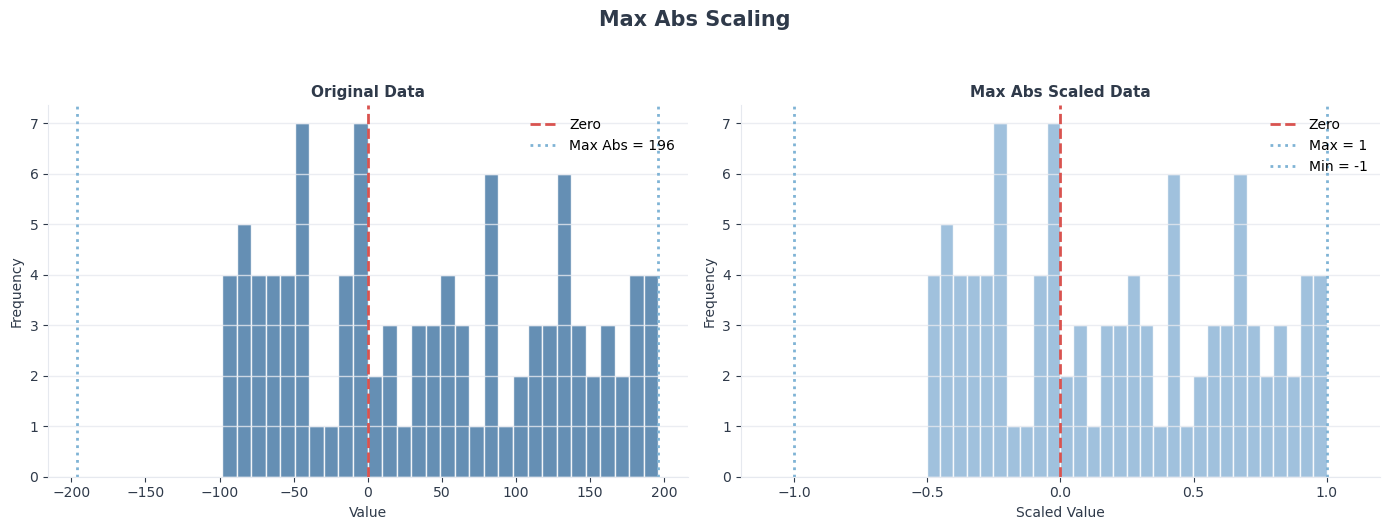

In [45]:
# Visualizing Max Abs Scaling
fig, axes = plt.subplots(1, 2, figsize=(14, 5), facecolor='white')

# Corporate palette (official)
MAIN_BLUE = '#4A7BA7'
LIGHT_BLUE = '#8FB6D8'
GRID_COLOR = '#E6E9EF'
TEXT_COLOR = '#2F3A4A'
MEAN_COLOR = '#D9534F'
RANGE_COLOR = '#7FB3D5'

# Before scaling
axes[0].hist(
    data_with_negatives,
    bins=30,
    color=MAIN_BLUE,
    alpha=0.85,
    edgecolor='white'
)

axes[0].axvline(
    0,
    color=MEAN_COLOR,
    linestyle='--',
    linewidth=2,
    label='Zero'
)

axes[0].axvline(
    max_abs_val,
    color=RANGE_COLOR,
    linestyle=':',
    linewidth=2,
    label=f'Max Abs = {max_abs_val:.0f}'
)

axes[0].axvline(
    -max_abs_val,
    color=RANGE_COLOR,
    linestyle=':',
    linewidth=2
)

axes[0].set_title(
    'Original Data',
    fontsize=11,
    fontweight='bold',
    color=TEXT_COLOR
)

axes[0].set_xlabel('Value', fontsize=10, color=TEXT_COLOR)
axes[0].set_ylabel('Frequency', fontsize=10, color=TEXT_COLOR)

axes[0].grid(
    axis='y',
    color=GRID_COLOR,
    linewidth=1,
    alpha=0.8
)

# Clean look
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].spines['left'].set_color(GRID_COLOR)
axes[0].spines['bottom'].set_color(GRID_COLOR)
axes[0].tick_params(colors=TEXT_COLOR)

axes[0].legend(frameon=False)

# After scaling
axes[1].hist(
    scaled_data,
    bins=30,
    color=LIGHT_BLUE,
    alpha=0.85,
    edgecolor='white'
)

axes[1].axvline(
    0,
    color=MEAN_COLOR,
    linestyle='--',
    linewidth=2,
    label='Zero'
)

axes[1].axvline(
    1,
    color=RANGE_COLOR,
    linestyle=':',
    linewidth=2,
    label='Max = 1'
)

axes[1].axvline(
    -1,
    color=RANGE_COLOR,
    linestyle=':',
    linewidth=2,
    label='Min = -1'
)

axes[1].set_title(
    'Max Abs Scaled Data',
    fontsize=11,
    fontweight='bold',
    color=TEXT_COLOR
)

axes[1].set_xlabel('Scaled Value', fontsize=10, color=TEXT_COLOR)
axes[1].set_ylabel('Frequency', fontsize=10, color=TEXT_COLOR)
axes[1].set_xlim(-1.2, 1.2)

axes[1].grid(
    axis='y',
    color=GRID_COLOR,
    linewidth=1,
    alpha=0.8
)

# Clean look
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].spines['left'].set_color(GRID_COLOR)
axes[1].spines['bottom'].set_color(GRID_COLOR)
axes[1].tick_params(colors=TEXT_COLOR)

axes[1].legend(frameon=False)

plt.suptitle(
    'Max Abs Scaling',
    fontsize=15,
    fontweight='bold',
    color=TEXT_COLOR,
    y=1.05
)

plt.tight_layout()
plt.show()

In [43]:
# Aplicar aos dados originais (forçar alguns valores negativos para demonstração)
df_maxabs_demo = df_original.copy()
df_maxabs_demo['Rooms'] = df_maxabs_demo['Rooms'] - 3  # Centralizar em zero

area_maxabs, area_max_abs = max_abs_scale(df_maxabs_demo['Area'].values)
rooms_maxabs, rooms_max_abs = max_abs_scale(df_maxabs_demo['Rooms'].values)
price_maxabs, price_max_abs = max_abs_scale(
    df_maxabs_demo['Price_per_m2'].values)

df_maxabs = pd.DataFrame({
    'Area_maxabs': area_maxabs,
    'Rooms_maxabs': rooms_maxabs,
    'Price_maxabs': price_maxabs
})

print("\nMAX ABS SCALING - DATASET ORIGINAL")
print("="*70)
print("\nMáximos absolutos:")
print(f"Area:  {area_max_abs:.2f}")
print(f"Rooms: {rooms_max_abs:.2f}")
print(f"Price: {price_max_abs:.2f}")

print("\nDados escalados:")
print(df_maxabs.describe())


MAX ABS SCALING - DATASET ORIGINAL

Máximos absolutos:
Area:  494.10
Rooms: 2.00
Price: 9966.28

Dados escalados:
       Area_maxabs  Rooms_maxabs  Price_maxabs
count   100.000000    100.000000    100.000000
mean      0.529411     -0.045000      0.566216
std       0.270938      0.700271      0.259149
min       0.106224     -1.000000      0.105020
25%       0.277152     -0.625000      0.352638
50%       0.523911      0.000000      0.548739
75%       0.766226      0.500000      0.773159
max       1.000000      1.000000      1.000000


---
## 7. Robust Scaling

### Conceito

Robust Scaling usa **mediana e IQR (Interquartile Range)** em vez de média e desvio padrão, tornando-o robusto a outliers.

### Fórmula Matemática

$$
x_{\text{scaled}} = \frac{x - \text{median}}{\text{IQR}}
$$

Onde:

- **$x$** = valor original  
- **$median$** = medianda da *feature*
- IQR = Q3 - Q1 (Interquantile Range)
- Q1 = 1° Quartil (25%)
- Q3 = 3° Quartil (75%)


### Interpretação

O valor escalado representa quantos IQRs o valor está da mediana.

### Propriedades

1. Robusto a outliers
2. Usa estatísticas resistentes (mediana, quartis)
3. Não limita valores a intervalo específico
4. Preserva outliers mas reduz seu impacto
5. Melhor que Standardization quando há outliers

### Quando Usar

- Dados com muitos outliers
- Distribuições não-normais
- Quando outliers não devem dominar a escala
- Alternativa robusta à Standardization

---

In [46]:
# Criar dados com outliers
np.random.seed(42)
data_with_outliers = np.concatenate([
    np.random.normal(100, 15, 90),  # Dados normais
    np.array([200, 250, 300, -50, -20])  # Outliers
])

# Implementação de Robust Scaling


def robust_scale(data):
    """
    Aplica Robust Scaling
    x_scaled = (x - median) / IQR
    """
    median = np.median(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1

    scaled = (data - median) / iqr
    return scaled, median, q1, q3, iqr


# Aplicar Robust Scaling
scaled_robust, med, q1, q3, iqr = robust_scale(data_with_outliers)

print("ROBUST SCALING")
print("="*70)
print("\nParâmetros calculados:")
print(f"Mediana: {med:.2f}")
print(f"Q1 (25%): {q1:.2f}")
print(f"Q3 (75%): {q3:.2f}")
print(f"IQR (Q3-Q1): {iqr:.2f}")

print(
    f"\nRange original: [{data_with_outliers.min():.2f}, {data_with_outliers.max():.2f}]")
print(
    f"Range escalado: [{scaled_robust.min():.2f}, {scaled_robust.max():.2f}]")

ROBUST SCALING

Parâmetros calculados:
Mediana: 98.27
Q1 (25%): 90.65
Q3 (75%): 108.66
IQR (Q3-Q1): 18.01

Range original: [-50.00, 300.00]
Range escalado: [-8.23, 11.20]


In [47]:
# Comparar Standardization vs Robust Scaling com outliers
from scipy import stats

# Standardization
scaled_standard, _, _ = standardize(data_with_outliers)

# Comparação
print("\nCOMPARAÇÃO: STANDARDIZATION VS ROBUST SCALING (com outliers)")
print("="*70)

print("\nStandardization:")
print(f"  Média: {data_with_outliers.mean():.2f}")
print(f"  Std: {data_with_outliers.std():.2f}")
print(
    f"  Range escalado: [{scaled_standard.min():.2f}, {scaled_standard.max():.2f}]")
print(
    f"  Dados entre -3 e 3: {((scaled_standard >= -3) & (scaled_standard <= 3)).sum()}/{len(scaled_standard)}")

print("\nRobust Scaling:")
print(f"  Mediana: {med:.2f}")
print(f"  IQR: {iqr:.2f}")
print(
    f"  Range escalado: [{scaled_robust.min():.2f}, {scaled_robust.max():.2f}]")
print(
    f"  Dados entre -3 e 3: {((scaled_robust >= -3) & (scaled_robust <= 3)).sum()}/{len(scaled_robust)}")


COMPARAÇÃO: STANDARDIZATION VS ROBUST SCALING (com outliers)

Standardization:
  Média: 100.49
  Std: 36.57
  Range escalado: [-4.11, 5.45]
  Dados entre -3 e 3: 91/95

Robust Scaling:
  Mediana: 98.27
  IQR: 18.01
  Range escalado: [-8.23, 11.20]
  Dados entre -3 e 3: 90/95


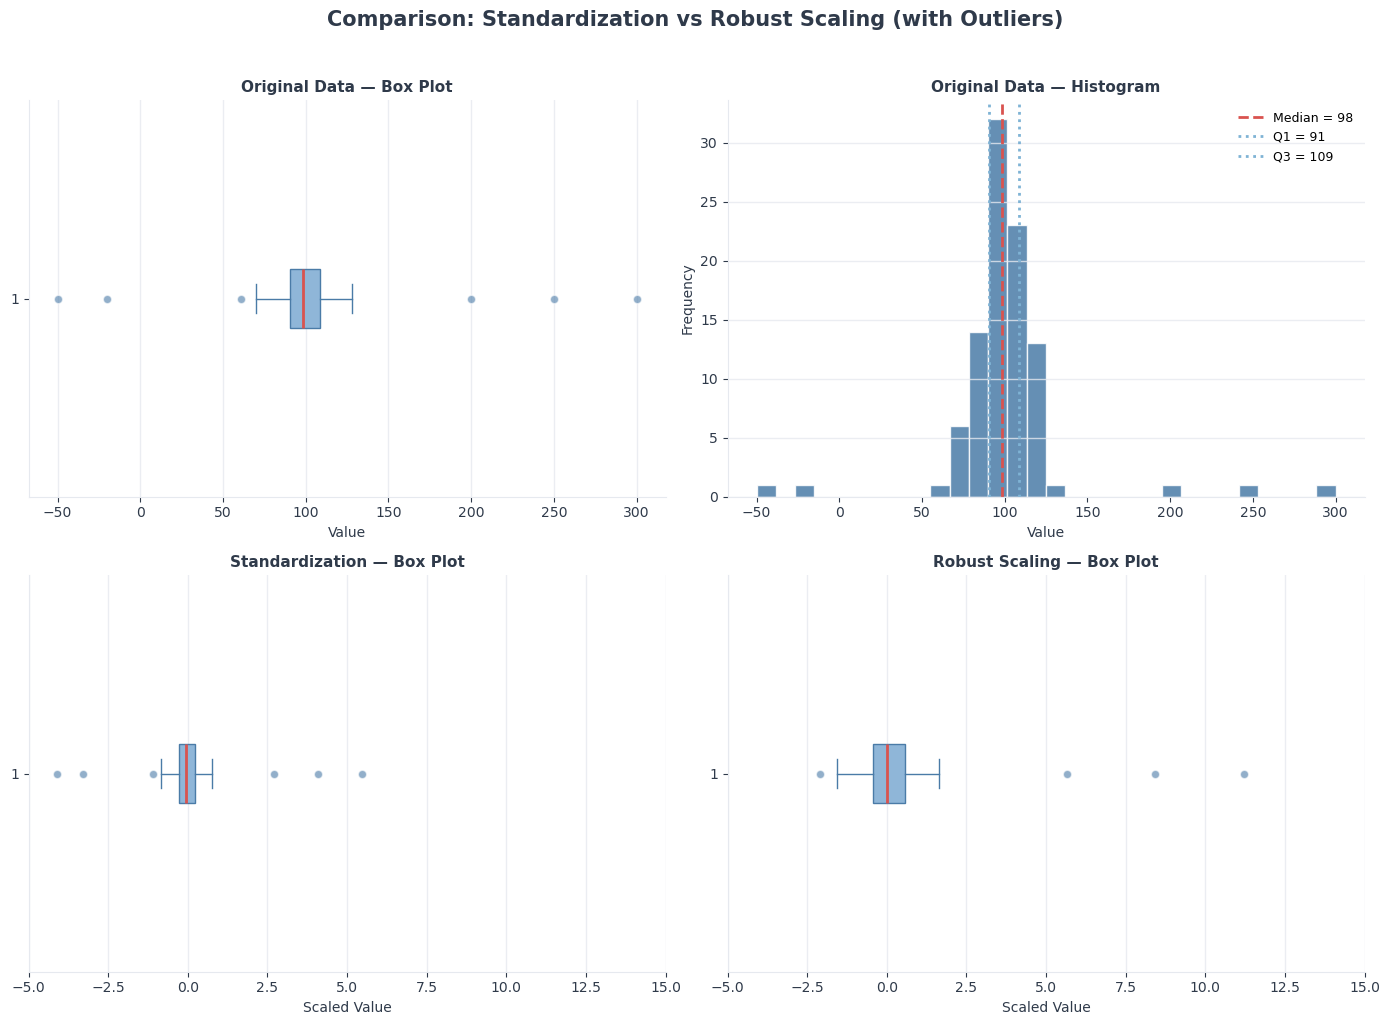


Observation: Robust Scaling preserves outliers while reducing their influence on scale.


In [59]:
# Visualizing comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10), facecolor='white')

# Corporate palette (official)
MAIN_BLUE = '#4A7BA7'
LIGHT_BLUE = '#8FB6D8'
GRID_COLOR = '#E6E9EF'
TEXT_COLOR = '#2F3A4A'
MEAN_COLOR = '#D9534F'
RANGE_COLOR = '#7FB3D5'

# -------------------------
# Original — Box Plot
# -------------------------
axes[0, 0].boxplot(
    data_with_outliers,
    vert=False,
    patch_artist=True,
    boxprops=dict(facecolor=LIGHT_BLUE, color=MAIN_BLUE),
    medianprops=dict(color=MEAN_COLOR, linewidth=2),
    whiskerprops=dict(color=MAIN_BLUE),
    capprops=dict(color=MAIN_BLUE),
    flierprops=dict(marker='o', markerfacecolor=MAIN_BLUE,
                    markeredgecolor='white', alpha=0.6)
)

axes[0, 0].set_title(
    'Original Data — Box Plot',
    fontsize=11,
    fontweight='bold',
    color=TEXT_COLOR
)

axes[0, 0].set_xlabel('Value', fontsize=10, color=TEXT_COLOR)

axes[0, 0].grid(
    axis='x',
    color=GRID_COLOR,
    linewidth=1,
    alpha=0.8
)

# Clean look
axes[0, 0].spines['top'].set_visible(False)
axes[0, 0].spines['right'].set_visible(False)
axes[0, 0].spines['left'].set_color(GRID_COLOR)
axes[0, 0].spines['bottom'].set_color(GRID_COLOR)
axes[0, 0].tick_params(colors=TEXT_COLOR)

# -------------------------
# Original — Histogram
# -------------------------
axes[0, 1].hist(
    data_with_outliers,
    bins=30,
    color=MAIN_BLUE,
    alpha=0.85,
    edgecolor='white'
)

axes[0, 1].axvline(
    med,
    color=MEAN_COLOR,
    linestyle='--',
    linewidth=2,
    label=f'Median = {med:.0f}'
)

axes[0, 1].axvline(
    q1,
    color=RANGE_COLOR,
    linestyle=':',
    linewidth=2,
    label=f'Q1 = {q1:.0f}'
)

axes[0, 1].axvline(
    q3,
    color=RANGE_COLOR,
    linestyle=':',
    linewidth=2,
    label=f'Q3 = {q3:.0f}'
)

axes[0, 1].set_title(
    'Original Data — Histogram',
    fontsize=11,
    fontweight='bold',
    color=TEXT_COLOR
)

axes[0, 1].set_xlabel('Value', fontsize=10, color=TEXT_COLOR)
axes[0, 1].set_ylabel('Frequency', fontsize=10, color=TEXT_COLOR)

axes[0, 1].grid(
    axis='y',
    color=GRID_COLOR,
    linewidth=1,
    alpha=0.8
)

axes[0, 1].legend(frameon=False, fontsize=9)

# Clean look
axes[0, 1].spines['top'].set_visible(False)
axes[0, 1].spines['right'].set_visible(False)
axes[0, 1].spines['left'].set_color(GRID_COLOR)
axes[0, 1].spines['bottom'].set_color(GRID_COLOR)
axes[0, 1].tick_params(colors=TEXT_COLOR)

# -------------------------
# Standardization — Box Plot
# -------------------------
axes[1, 0].boxplot(
    scaled_standard,
    vert=False,
    patch_artist=True,
    boxprops=dict(facecolor=LIGHT_BLUE, color=MAIN_BLUE),
    medianprops=dict(color=MEAN_COLOR, linewidth=2),
    whiskerprops=dict(color=MAIN_BLUE),
    capprops=dict(color=MAIN_BLUE),
    flierprops=dict(marker='o', markerfacecolor=MAIN_BLUE,
                    markeredgecolor='white', alpha=0.6)
)

axes[1, 0].set_title(
    'Standardization — Box Plot',
    fontsize=11,
    fontweight='bold',
    color=TEXT_COLOR
)

axes[1, 0].set_xlabel('Scaled Value', fontsize=10, color=TEXT_COLOR)
axes[1, 0].set_xlim(-5, 15)

axes[1, 0].grid(
    axis='x',
    color=GRID_COLOR,
    linewidth=1,
    alpha=0.8
)

# Clean look
axes[1, 0].spines['top'].set_visible(False)
axes[1, 0].spines['right'].set_visible(False)
axes[1, 0].spines['left'].set_color(GRID_COLOR)
axes[1, 0].spines['bottom'].set_color(GRID_COLOR)
axes[1, 0].tick_params(colors=TEXT_COLOR)

# -------------------------
# Robust Scaling — Box Plot
# -------------------------
axes[1, 1].boxplot(
    scaled_robust,
    vert=False,
    patch_artist=True,
    boxprops=dict(facecolor=LIGHT_BLUE, color=MAIN_BLUE),
    medianprops=dict(color=MEAN_COLOR, linewidth=2),
    whiskerprops=dict(color=MAIN_BLUE),
    capprops=dict(color=MAIN_BLUE),
    flierprops=dict(marker='o', markerfacecolor=MAIN_BLUE,
                    markeredgecolor='white', alpha=0.6)
)

axes[1, 1].set_title(
    'Robust Scaling — Box Plot',
    fontsize=11,
    fontweight='bold',
    color=TEXT_COLOR
)

axes[1, 1].set_xlabel('Scaled Value', fontsize=10, color=TEXT_COLOR)
axes[1, 1].set_xlim(-5, 15)

axes[1, 1].grid(
    axis='x',
    color=GRID_COLOR,
    linewidth=1,
    alpha=0.8
)

# Clean look
axes[1, 1].spines['top'].set_visible(False)
axes[1, 1].spines['right'].set_visible(False)
axes[1, 1].spines['left'].set_color(GRID_COLOR)
axes[1, 1].spines['bottom'].set_color(GRID_COLOR)
axes[1, 1].tick_params(colors=TEXT_COLOR)

# -------------------------
# Global title
# -------------------------
plt.suptitle(
    'Comparison: Standardization vs Robust Scaling (with Outliers)',
    fontsize=15,
    fontweight='bold',
    color=TEXT_COLOR,
    y=1.02
)

plt.tight_layout()
plt.show()

print(
    "\nObservation: Robust Scaling preserves outliers while reducing their influence on scale."
)

In [49]:
# Aplicar aos dados originais
area_robust, area_med, area_q1, area_q3, area_iqr = robust_scale(
    df_original['Area'].values)
rooms_robust, rooms_med, rooms_q1, rooms_q3, rooms_iqr = robust_scale(
    df_original['Rooms'].values)
price_robust, price_med, price_q1, price_q3, price_iqr = robust_scale(
    df_original['Price_per_m2'].values)

df_robust = pd.DataFrame({
    'Area_robust': area_robust,
    'Rooms_robust': rooms_robust,
    'Price_robust': price_robust
})

print("\nROBUST SCALING - DATASET ORIGINAL")
print("="*70)
print("\nParâmetros:")
print(f"Area    - Mediana: {area_med:.2f}, IQR: {area_iqr:.2f}")
print(f"Rooms   - Mediana: {rooms_med:.2f}, IQR: {rooms_iqr:.2f}")
print(f"Price   - Mediana: {price_med:.2f}, IQR: {price_iqr:.2f}")

print("\nDados escalados:")
print(df_robust.describe())


ROBUST SCALING - DATASET ORIGINAL

Parâmetros:
Area    - Mediana: 258.86, IQR: 241.65
Rooms   - Mediana: 3.00, IQR: 2.25
Price   - Mediana: 5468.89, IQR: 4191.03

Dados escalados:
       Area_robust  Rooms_robust  Price_robust
count   100.000000    100.000000  1.000000e+02
mean      0.011244     -0.040000  4.155879e-02
std       0.553982      0.622463  6.162580e-01
min      -0.854038     -0.888889 -1.055166e+00
25%      -0.504545     -0.555556 -4.663296e-01
50%       0.000000      0.000000  1.084202e-16
75%       0.495455      0.444444  5.336704e-01
max       0.973449      0.888889  1.073100e+00


---
## 8. Comparação Prática

### Visualização Lado a Lado

In [50]:
# Criar dataset com todas as transformações
comparison_df = pd.DataFrame({
    'Original_Area': df_original['Area'],
    'Standardized': df_standardized['Area_std'],
    'MinMax': df_minmax['Area_minmax'],
    'MeanNorm': df_mean_norm['Area_mean'],
    'MaxAbs': df_maxabs['Area_maxabs'],
    'Robust': df_robust['Area_robust']
})

print("COMPARAÇÃO DE TODAS AS TÉCNICAS")
print("="*70)
print("\nEstatísticas comparativas (Feature: Area):")
print(comparison_df.describe())

COMPARAÇÃO DE TODAS AS TÉCNICAS

Estatísticas comparativas (Feature: Area):
       Original_Area  Standardized      MinMax      MeanNorm      MaxAbs  \
count     100.000000  1.000000e+02  100.000000  1.000000e+02  100.000000   
mean      261.581335 -1.554312e-16    0.473482 -5.273559e-17    0.529411   
std       133.870235  1.005038e+00    0.303138  3.031385e-01    0.270938   
min        52.484953 -1.569802e+00    0.000000 -4.734820e-01    0.106224   
25%       136.940342 -9.357488e-01    0.191242 -2.822396e-01    0.277152   
50%       258.864105 -2.039975e-02    0.467329 -6.152950e-03    0.523911   
75%       378.591404  8.784592e-01    0.738442  2.649600e-01    0.766226   
max       494.099121  1.745639e+00    1.000000  5.265180e-01    1.000000   

           Robust  
count  100.000000  
mean     0.011244  
std      0.553982  
min     -0.854038  
25%     -0.504545  
50%      0.000000  
75%      0.495455  
max      0.973449  


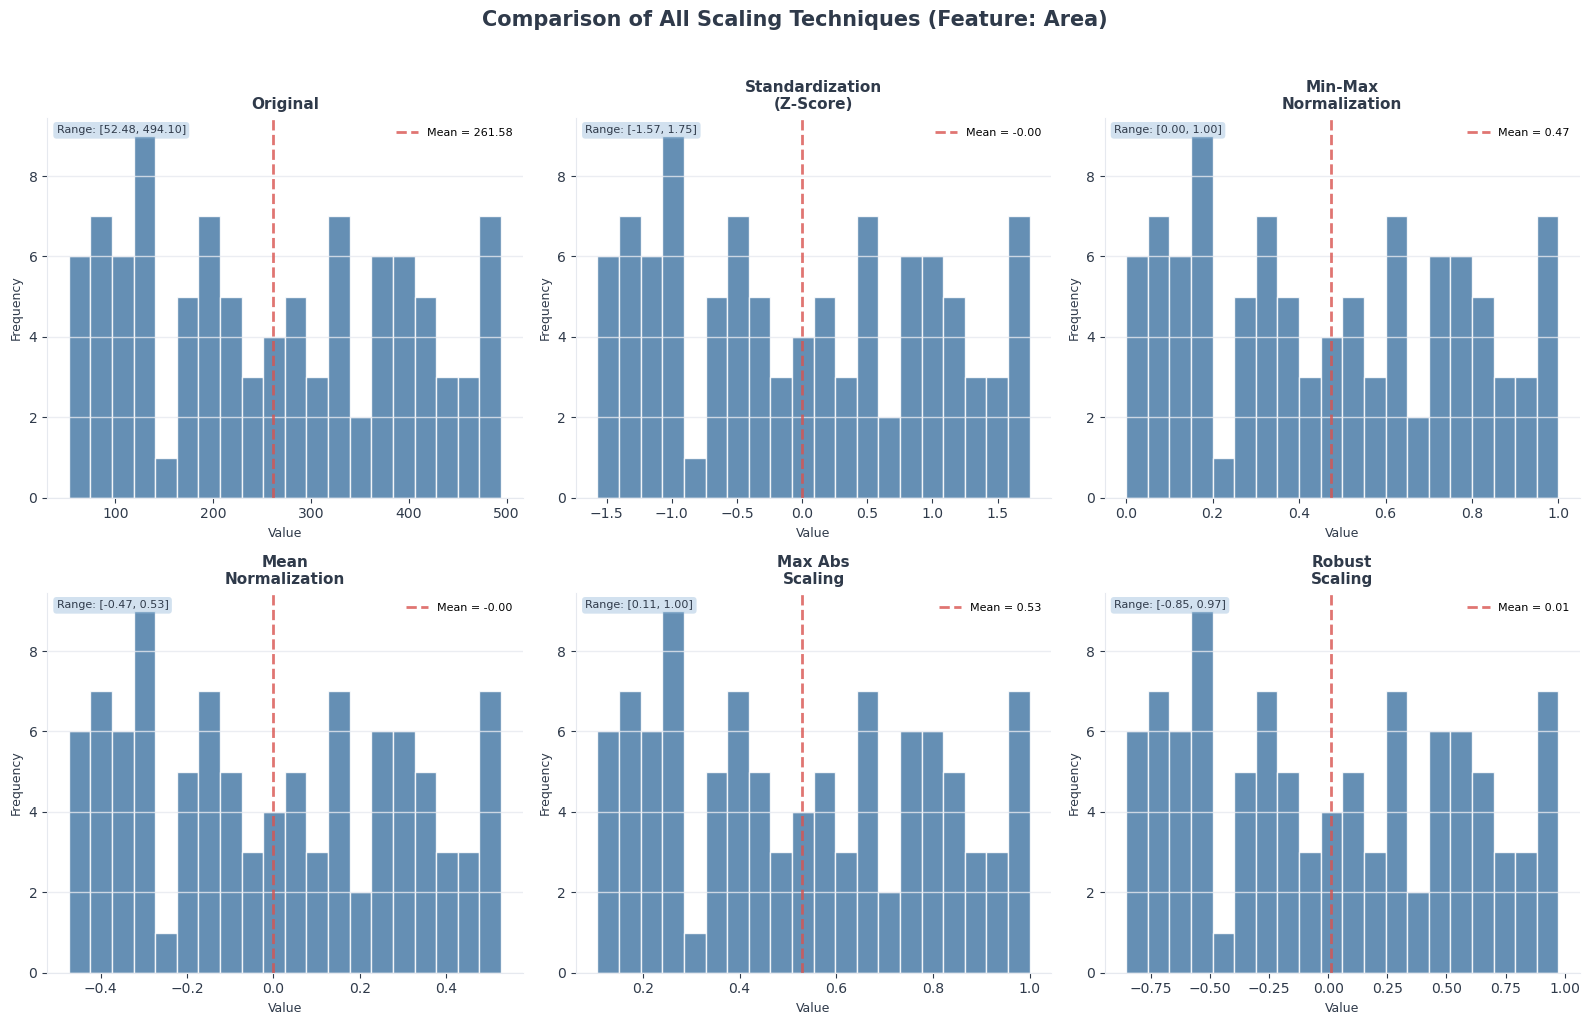

In [60]:
# Visualizing all scaling transformations
fig, axes = plt.subplots(2, 3, figsize=(16, 10), facecolor='white')
axes = axes.flatten()

# Corporate palette (official)
MAIN_BLUE = '#4A7BA7'
LIGHT_BLUE = '#8FB6D8'
GRID_COLOR = '#E6E9EF'
TEXT_COLOR = '#2F3A4A'
MEAN_COLOR = '#D9534F'
RANGE_COLOR = '#7FB3D5'

methods = [
    'Original_Area',
    'Standardized',
    'MinMax',
    'MeanNorm',
    'MaxAbs',
    'Robust'
]

titles = [
    'Original',
    'Standardization\n(Z-Score)',
    'Min-Max\nNormalization',
    'Mean\nNormalization',
    'Max Abs\nScaling',
    'Robust\nScaling'
]

# Color assignment (kept subtle and consistent)
colors = [
    MAIN_BLUE,
    MAIN_BLUE,
    MAIN_BLUE,
    MAIN_BLUE,
    MAIN_BLUE,
    MAIN_BLUE
]

for idx, (method, title, color) in enumerate(zip(methods, titles, colors)):
    ax = axes[idx]

    ax.hist(
        comparison_df[method],
        bins=20,
        color=color,
        alpha=0.85,
        edgecolor='white'
    )

    mean_val = comparison_df[method].mean()

    ax.axvline(
        mean_val,
        color=MEAN_COLOR,
        linestyle='--',
        linewidth=2,
        alpha=0.8,
        label=f'Mean = {mean_val:.2f}'
    )

    ax.set_title(
        title,
        fontsize=11,
        fontweight='bold',
        color=TEXT_COLOR
    )

    ax.set_xlabel('Value', fontsize=9, color=TEXT_COLOR)
    ax.set_ylabel('Frequency', fontsize=9, color=TEXT_COLOR)

    ax.grid(
        axis='y',
        color=GRID_COLOR,
        linewidth=1,
        alpha=0.8
    )

    # Clean look
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color(GRID_COLOR)
    ax.spines['bottom'].set_color(GRID_COLOR)
    ax.tick_params(colors=TEXT_COLOR)

    # Range annotation
    ax.text(
        0.02,
        0.98,
        f'Range: [{comparison_df[method].min():.2f}, '
        f'{comparison_df[method].max():.2f}]',
        transform=ax.transAxes,
        fontsize=8,
        verticalalignment='top',
        color=TEXT_COLOR,
        bbox=dict(
            boxstyle='round',
            facecolor=LIGHT_BLUE,
            edgecolor='none',
            alpha=0.4
        )
    )

    ax.legend(frameon=False, fontsize=8)

plt.suptitle(
    'Comparison of All Scaling Techniques (Feature: Area)',
    fontsize=15,
    fontweight='bold',
    color=TEXT_COLOR,
    y=1.02
)

plt.tight_layout()
plt.show()

### Tabela Resumo Comparativa

In [52]:
# Criar tabela comparativa
summary_data = []

for method in methods:
    summary_data.append({
        'Método': method,
        'Mínimo': comparison_df[method].min(),
        'Média': comparison_df[method].mean(),
        'Mediana': comparison_df[method].median(),
        'Máximo': comparison_df[method].max(),
        'Std Dev': comparison_df[method].std()
    })

summary_table = pd.DataFrame(summary_data)

print("\nTABELA COMPARATIVA")
print("="*70)
print(summary_table.to_string(index=False))


TABELA COMPARATIVA
       Método    Mínimo         Média    Mediana     Máximo    Std Dev
Original_Area 52.484953  2.615813e+02 258.864105 494.099121 133.870235
 Standardized -1.569802 -1.554312e-16  -0.020400   1.745639   1.005038
       MinMax  0.000000  4.734820e-01   0.467329   1.000000   0.303138
     MeanNorm -0.473482 -5.273559e-17  -0.006153   0.526518   0.303138
       MaxAbs  0.106224  5.294106e-01   0.523911   1.000000   0.270938
       Robust -0.854038  1.124444e-02   0.000000   0.973449   0.553982


---
## 9. Quando Usar Cada Uma

### Guia de Decisão

In [53]:
# Criar guia visual
decision_guide = pd.DataFrame({
    'Técnica': ['Standardization\n(Z-Score)', 'Min-Max\nNormalization',
                'Mean\nNormalization', 'Max Abs\nScaling', 'Robust\nScaling'],
    'Outliers?': ['❌ Sensível', '❌❌ Muito Sensível', '❌ Sensível',
                  '⚠️ Moderado', '✅ Robusto'],
    'Range': ['Ilimitado', '[0, 1]', '≈[-1, 1]', '[-1, 1]', 'Ilimitado'],
    'Preserva Zeros?': ['Não', 'Não', 'Não', '✅ Sim', 'Não'],
    'Uso Comum': ['ML Geral\nRedes Neurais', 'Redes Neurais\nImagens',
                  'Raro', 'Dados Esparsos', 'Com Outliers']
})

print("\nGUIA DE DECISÃO: QUAL TÉCNICA USAR?")
print("="*70)
print(decision_guide.to_string(index=False))


GUIA DE DECISÃO: QUAL TÉCNICA USAR?
                   Técnica         Outliers?     Range Preserva Zeros?               Uso Comum
Standardization\n(Z-Score)        ❌ Sensível Ilimitado             Não ML Geral\nRedes Neurais
    Min-Max\nNormalization ❌❌ Muito Sensível    [0, 1]             Não  Redes Neurais\nImagens
       Mean\nNormalization        ❌ Sensível  ≈[-1, 1]             Não                    Raro
          Max Abs\nScaling       ⚠️ Moderado   [-1, 1]           ✅ Sim          Dados Esparsos
           Robust\nScaling         ✅ Robusto Ilimitado             Não            Com Outliers


### Árvore de Decisão para Escolher Técnica

### Por Algoritmo

**Standardization (Z-Score):**
- Regressão Linear/Logística
- Redes Neurais
- SVM
- PCA
- K-Means

**Min-Max Normalization:**
- Redes Neurais (camada de entrada)
- K-Nearest Neighbors
- Algoritmos de imagem

**Robust Scaling:**
- Qualquer algoritmo + dados com outliers
- Quando Standardization não funciona bem

**Max Abs Scaling:**
- Dados esparsos
- Quando sinais importam

**Algoritmos que NÃO precisam:**
- Árvores de Decisão
- Random Forests
- Gradient Boosting (XGBoost, LightGBM)

---
## 10. Implementação com Scikit-Learn

### Usando Scalers do Scikit-Learn

In [55]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler

# Preparar dados
X = df_original[['Area', 'Rooms', 'Price_per_m2']].values

print("IMPLEMENTAÇÃO COM SCIKIT-LEARN")
print("="*70)
print(f"\nDados originais shape: {X.shape}")

# 1. StandardScaler
scaler_standard = StandardScaler()
X_standard = scaler_standard.fit_transform(X)

print("\n1. StandardScaler:")
print(f"   Médias calculadas: {scaler_standard.mean_}")
print(f"   Std calculados: {scaler_standard.scale_}")

# 2. MinMaxScaler
scaler_minmax = MinMaxScaler()
X_minmax = scaler_minmax.fit_transform(X)

print("\n2. MinMaxScaler:")
print(f"   Mínimos calculados: {scaler_minmax.data_min_}")
print(f"   Máximos calculados: {scaler_minmax.data_max_}")

# 3. MaxAbsScaler
scaler_maxabs = MaxAbsScaler()
X_maxabs = scaler_maxabs.fit_transform(X)

print("\n3. MaxAbsScaler:")
print(f"   Max abs calculados: {scaler_maxabs.max_abs_}")

# 4. RobustScaler
scaler_robust = RobustScaler()
X_robust = scaler_robust.fit_transform(X)

print("\n4. RobustScaler:")
print(f"   Medianas calculadas: {scaler_robust.center_}")
print(f"   IQRs calculados: {scaler_robust.scale_}")

IMPLEMENTAÇÃO COM SCIKIT-LEARN

Dados originais shape: (100, 3)

1. StandardScaler:
   Médias calculadas: [2.61581335e+02 2.91000000e+00 5.64306585e+03]
   Std calculados: [1.33199202e+02 1.39352072e+00 2.56980690e+03]

2. MinMaxScaler:
   Mínimos calculados: [5.24849527e+01 1.00000000e+00 1.04666376e+03]
   Máximos calculados: [4.94099121e+02 5.00000000e+00 9.96628330e+03]

3. MaxAbsScaler:
   Max abs calculados: [4.94099121e+02 5.00000000e+00 9.96628330e+03]

4. RobustScaler:
   Medianas calculadas: [2.58864105e+02 3.00000000e+00 5.46889193e+03]
   IQRs calculados: [2.41651061e+02 2.25000000e+00 4.19102542e+03]


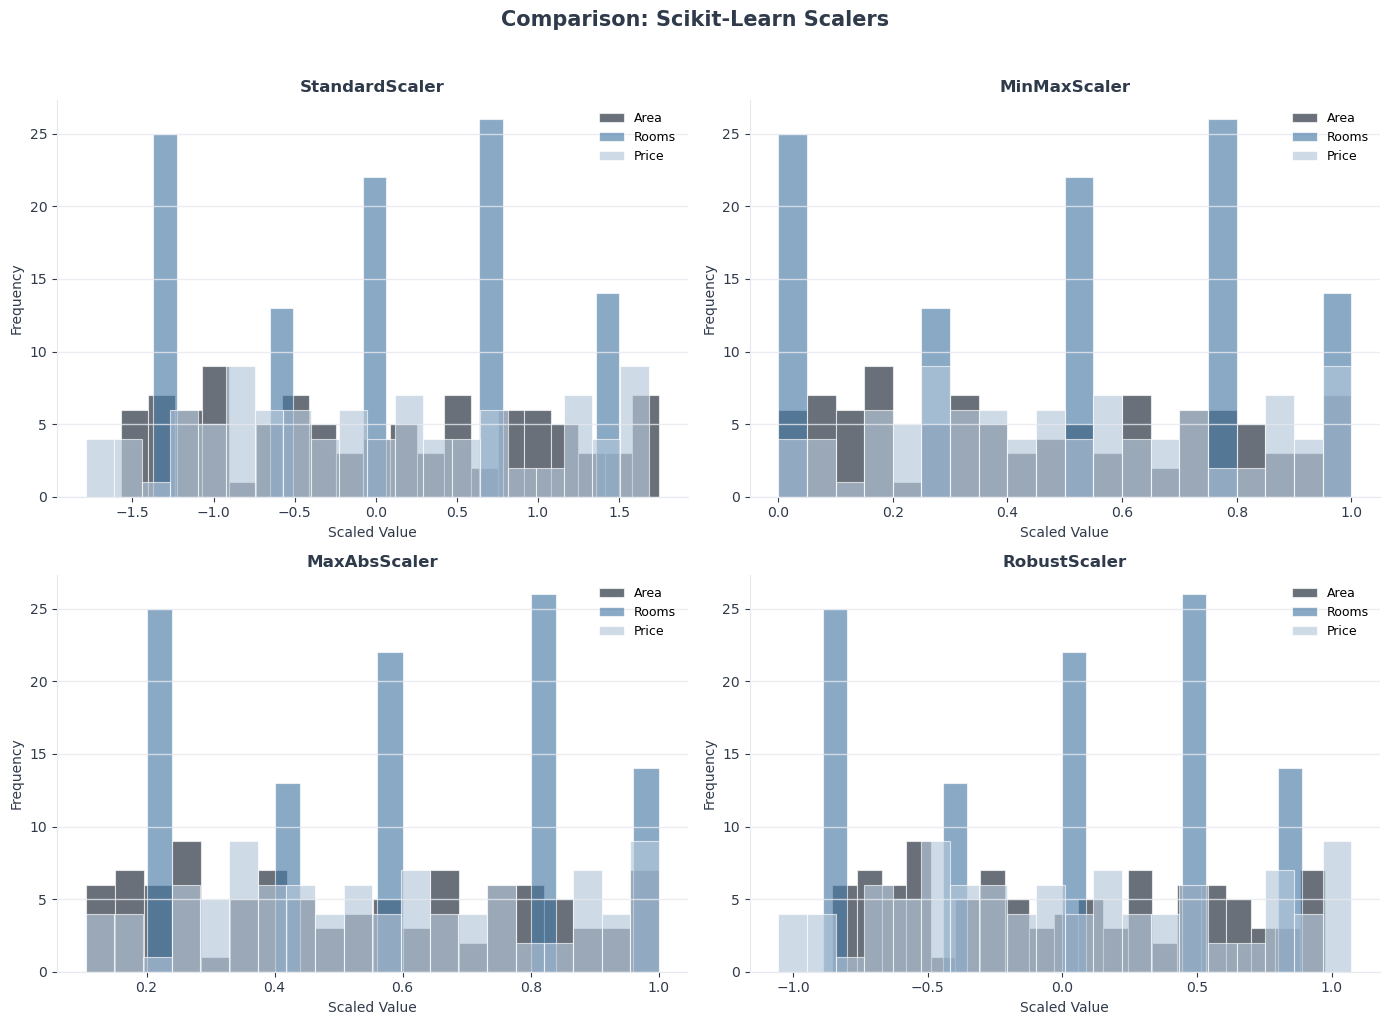

In [62]:
# Comparing scaler results
fig, axes = plt.subplots(2, 2, figsize=(14, 10), facecolor='white')

TEXT_COLOR = '#2F3A4A'
GRID_COLOR = '#E6E9EF'

scalers_results = [
    (X_standard, 'StandardScaler'),
    (X_minmax, 'MinMaxScaler'),
    (X_maxabs, 'MaxAbsScaler'),
    (X_robust, 'RobustScaler')
]

FEATURE_COLORS = {
    'Area':  '#1A2332',  # Dark blue
    'Rooms': '#4A7BA7',  # Medium blue
    'Price': '#B4C7D9'   # Light blue-gray
}

for idx, (data, name) in enumerate(scalers_results):
    ax = axes[idx // 2, idx % 2]

    for feat_idx, feat_name in enumerate(['Area', 'Rooms', 'Price']):
        ax.hist(
            data[:, feat_idx],
            bins=20,
            alpha=0.65,
            color=FEATURE_COLORS[feat_name],
            edgecolor='white',
            linewidth=0.8,
            label=feat_name
        )

    ax.set_title(
        name,
        fontsize=12,
        fontweight='bold',
        color=TEXT_COLOR
    )

    ax.set_xlabel('Scaled Value', fontsize=10, color=TEXT_COLOR)
    ax.set_ylabel('Frequency', fontsize=10, color=TEXT_COLOR)

    ax.grid(
        axis='y',
        color=GRID_COLOR,
        linewidth=1,
        alpha=0.8
    )

    # Clean axes
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color(GRID_COLOR)
    ax.spines['bottom'].set_color(GRID_COLOR)
    ax.tick_params(colors=TEXT_COLOR)

    ax.legend(frameon=False, fontsize=9)

plt.suptitle(
    'Comparison: Scikit-Learn Scalers',
    fontsize=15,
    fontweight='bold',
    color=TEXT_COLOR,
    y=1.02
)

plt.tight_layout()
plt.show()

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Criar target sintético baseado em Price
y = (df_original['Price_per_m2'] >
     df_original['Price_per_m2'].median()).astype(int)

# Split treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("WORKFLOW COMPLETO: TREINO E TESTE")
print("="*70)

# Testar cada scaler
results = []

scalers = {
    'Sem Scaling': None,
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}

for name, scaler in scalers.items():
    # Preparar dados
    if scaler is None:
        X_train_scaled = X_train
        X_test_scaled = X_test
    else:
        # FIT apenas no treino!
        scaler.fit(X_train)
        X_train_scaled = scaler.transform(X_train)
        X_test_scaled = scaler.transform(X_test)

    # Treinar modelo
    model = LogisticRegression(random_state=42, max_iter=1000)
    model.fit(X_train_scaled, y_train)

    # Avaliar
    train_acc = model.score(X_train_scaled, y_train)
    test_acc = model.score(X_test_scaled, y_test)

    results.append({
        'Scaler': name,
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc,
        'Diferença': train_acc - test_acc
    })

    print(f"\n{name}:")
    print(f"  Train Accuracy: {train_acc:.4f}")
    print(f"  Test Accuracy:  {test_acc:.4f}")

# Criar DataFrame
results_df = pd.DataFrame(results)

print("\n" + "="*70)
print("RESUMO:")
print(results_df.to_string(index=False))

WORKFLOW COMPLETO: TREINO E TESTE

Sem Scaling:
  Train Accuracy: 1.0000
  Test Accuracy:  1.0000

StandardScaler:
  Train Accuracy: 0.9625
  Test Accuracy:  0.9000

MinMaxScaler:
  Train Accuracy: 0.9750
  Test Accuracy:  0.9000

RobustScaler:
  Train Accuracy: 0.9750
  Test Accuracy:  0.9000

RESUMO:
        Scaler  Train Accuracy  Test Accuracy  Diferença
   Sem Scaling          1.0000            1.0     0.0000
StandardScaler          0.9625            0.9     0.0625
  MinMaxScaler          0.9750            0.9     0.0750
  RobustScaler          0.9750            0.9     0.0750


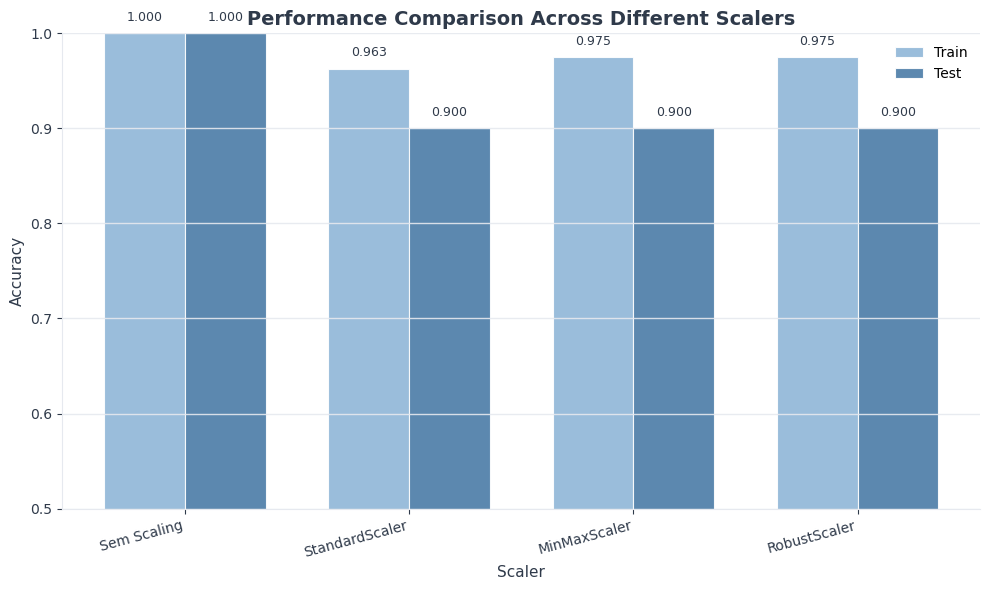

In [65]:
# Visualizing results
fig, ax = plt.subplots(figsize=(10, 6), facecolor='white')

MAIN_BLUE = '#4A7BA7'   # destaque principal
DARK_BLUE = '#1A2332'   # treino
LIGHT_BLUE = '#8FB6D8'   # teste
GRID_COLOR = '#E6E9EF'
TEXT_COLOR = '#2F3A4A'


x_pos = np.arange(len(results_df))
width = 0.36

bars1 = ax.bar(
    x_pos - width / 2,
    results_df['Train Accuracy'],
    width,
    label='Train',
    color=LIGHT_BLUE,
    alpha=0.9,
    edgecolor='white',
    linewidth=0.8
)

bars2 = ax.bar(
    x_pos + width / 2,
    results_df['Test Accuracy'],
    width,
    label='Test',
    color=MAIN_BLUE,
    alpha=0.9,
    edgecolor='white',
    linewidth=0.8
)

# Titles and labels
ax.set_title(
    'Performance Comparison Across Different Scalers',
    fontsize=14,
    fontweight='bold',
    color=TEXT_COLOR
)

ax.set_xlabel('Scaler', fontsize=11, color=TEXT_COLOR)
ax.set_ylabel('Accuracy', fontsize=11, color=TEXT_COLOR)

ax.set_xticks(x_pos)
ax.set_xticklabels(
    results_df['Scaler'],
    rotation=15,
    ha='right',
    fontsize=10,
    color=TEXT_COLOR
)

ax.set_ylim(0.5, 1.0)

# Grid and axes styling
ax.grid(
    axis='y',
    color=GRID_COLOR,
    linewidth=1,
    alpha=0.9
)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color(GRID_COLOR)
ax.spines['bottom'].set_color(GRID_COLOR)
ax.tick_params(colors=TEXT_COLOR)

ax.legend(frameon=False, fontsize=10)

# Value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.01,
            f'{height:.3f}',
            ha='center',
            va='bottom',
            fontsize=9,
            color=TEXT_COLOR
        )

plt.tight_layout()
plt.show()

### IMPORTANTE: Ordem Correta
```python
# ✅ CORRETO
scaler = StandardScaler()
scaler.fit(X_train)                    # Aprende apenas do treino
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Usa parâmetros do treino

# ❌ ERRADO
scaler = StandardScaler()
scaler.fit(X)  # Aprende de TODOS os dados (inclui teste!)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
```

**Por quê?**
- Data leakage: informação do teste vaza para o treino
- Avaliação otimista (não realista)
- Modelo não generaliza bem em produção

---
## 11. Resumo e Conclusões

### Tabela Resumo Final

| Técnica | Fórmula | Range | Sensível a Outliers | Quando Usar |
|---------|---------|-------|---------------------|-------------|
| **Standardization** | (x - μ) / σ | Ilimitado | ✅ Sim | ML geral, dados normais |
| **Min-Max** | (x - min) / (max - min) | [0, 1] | ✅✅ Muito | Redes neurais, imagens |
| **Mean Norm** | (x - μ) / (max - min) | ≈[-1, 1] | ✅ Sim | Raro |
| **Max Abs** | x / \|max\| | [-1, 1] | ⚠️ Moderado | Dados esparsos |
| **Robust** | (x - median) / IQR | Ilimitado | ❌ Não | Com outliers |

### Diferenças Principais

**Normalization** geralmente refere-se a técnicas que escalam para intervalo limitado:
- Min-Max [0, 1]
- Max Abs [-1, 1]

**Standardization** escala baseado em estatísticas (média, std):
- Z-Score (média=0, std=1)
- Robust (mediana=0, IQR=1)

### Pontos-Chave

1. **Sempre escale no split correto** (fit no treino, transform no teste)
2. **Teste múltiplas técnicas** e veja qual funciona melhor
3. **Outliers importam**: use Robust Scaling se houver muitos
4. **Árvores não precisam** de scaling
5. **Preserve os scalers** para usar em produção

### Fluxo Recomendado
```python
# 1. Split dados
X_train, X_test = train_test_split(...)

# 2. Escolher e treinar scaler
scaler = StandardScaler()
scaler.fit(X_train)

# 3. Transformar ambos
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Treinar modelo
model.fit(X_train_scaled, y_train)

# 5. Avaliar
model.score(X_test_scaled, y_test)
```

---